# Plotting and Visualization

In [1]:
from __future__ import division
from numpy.random import randn
import numpy as ns
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [2]:
matplotlib inline

In [3]:
pwd

'C:\\Users\\KeumSeungdo\\Google 드라이브\\2017-1학기\\전공 - 비즈니스 애널리틱스\\3. 과제\\lab-std'

## A brief matplotlib API primer

## FIRST STEP

We assume that you have already download the dataset. We need to first unzip the file.

Q1)Please read the data files.

In [4]:
import pandas as pd
csv_data = open('donations.csv')
df = pd.read_csv(csv_data)

c:\users\keumseungdo\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Q2) Please display the information on the data. How much data are we dealing with? What are the names of colums?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4084074 entries, 0 to 4084073
Data columns (total 16 columns):
cmte_id              object
cand_id              object
cand_nm              object
contbr_nm            object
contbr_city          object
contbr_st            object
contbr_zip           object
contbr_employer      object
contbr_occupation    object
contb_receipt_amt    float64
contb_receipt_dt     object
receipt_desc         object
memo_cd              object
memo_text            object
form_tp              object
file_num             int64
dtypes: float64(1), int64(1), object(14)
memory usage: 498.5+ MB


The size of the data is huge. It is better to use a small data set.

Q3) Make a sample of which the size is 4000. (HINT: NUMPY.random.choice())

In [52]:
import random
rows = np.random.choice(df.index.values, 4000)
sampled_df=df.ix[rows]
sampled_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
2458474,C00431445,P80003338,"Obama, Barack","LAWRENCE, PAULA",NEW YORK,NY,100750725,THE STARR FOUNDATION,PHILANTHROPY,100.0,22-OCT-08,NaN,NaN,NaN,SA17A,754317
3624190,C00431569,P00003392,"Clinton, Hillary Rodham","ROSENQUIST, THOMAS",SOUND BEACH,NY,117892240,RESEARCH FOUNDATION OF S,RSEARCH SCIENTIST,25.0,28-APR-08,NaN,NaN,NaN,SA17A,341172
1278015,C00431445,P80003338,"Obama, Barack","AULABAUGH, MARILYN",ESTES PARK,CO,8.05177e+08,NOT EMPLOYED,RETIRED,50.0,24-MAY-08,NaN,NaN,NaN,SA17A,753674
2289940,C00431445,P80003338,"Obama, Barack","BAUER, WILLIAM L MR.",SAYREVILLE,NJ,088721269,NOT EMPLOYED,RETIRED,250.0,30-JUN-08,NaN,NaN,NaN,SA17A,753769
204403,C00430470,P80002801,"McCain, John S","MARTINEZ, REGINO J. MR.",HOLLAND,MI,494248952,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,200.0,05-SEP-07,NaN,NaN,NaN,SA17A,315387


It would be intersting to see the amount of money for each candidate.

Q4) Please draw a stacked histgram using 'contb_receipt_amout' for candidates.

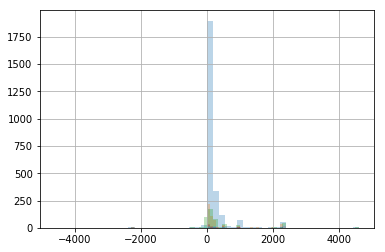

In [53]:
for name in sampled_df.cand_nm.unique():
    comp = sampled_df[sampled_df['cand_nm']==name]
    comp2 = comp['contb_receipt_amt']
    values = Series(comp2)
    values.hist(bins=50, stacked=True, alpha=0.3)

We want to compute the total amount of donatoins for each day and draw a chart.

Q5) In order to do this, please parse the 'contb_receipt_dt' column using datetime module.

In [54]:
import datetime as dt
sampled_df['contb_receipt_dt'] = pd.to_datetime(sampled_df['contb_receipt_dt'], format = '%d-%b-%y')
sampled_df.head()

c:\users\keumseungdo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
2458474,C00431445,P80003338,"Obama, Barack","LAWRENCE, PAULA",NEW YORK,NY,100750725,THE STARR FOUNDATION,PHILANTHROPY,100.0,2008-10-22,NaN,NaN,NaN,SA17A,754317
3624190,C00431569,P00003392,"Clinton, Hillary Rodham","ROSENQUIST, THOMAS",SOUND BEACH,NY,117892240,RESEARCH FOUNDATION OF S,RSEARCH SCIENTIST,25.0,2008-04-28,NaN,NaN,NaN,SA17A,341172
1278015,C00431445,P80003338,"Obama, Barack","AULABAUGH, MARILYN",ESTES PARK,CO,8.05177e+08,NOT EMPLOYED,RETIRED,50.0,2008-05-24,NaN,NaN,NaN,SA17A,753674
2289940,C00431445,P80003338,"Obama, Barack","BAUER, WILLIAM L MR.",SAYREVILLE,NJ,088721269,NOT EMPLOYED,RETIRED,250.0,2008-06-30,NaN,NaN,NaN,SA17A,753769
204403,C00430470,P80002801,"McCain, John S","MARTINEZ, REGINO J. MR.",HOLLAND,MI,494248952,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,200.0,2007-09-05,NaN,NaN,NaN,SA17A,315387


Q5) Please compute the total amount of donations for each day, and create a chart for a 'Obama, Barack' (HINT: dataframe - groupby() )

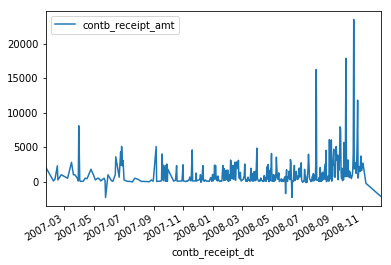

In [55]:
obama = sampled_df[['contb_receipt_dt', 'contb_receipt_amt', 'cand_nm']]
obama = obama[obama['cand_nm']=='Obama, Barack']
obama_new = obama[['contb_receipt_dt', 'contb_receipt_amt']]
result = obama_new.groupby('contb_receipt_dt').sum()
result.plot()

Q6) Please plot Obama ('Obama, Barack') vs. McCain ('McCain, John S') on the same chart. 

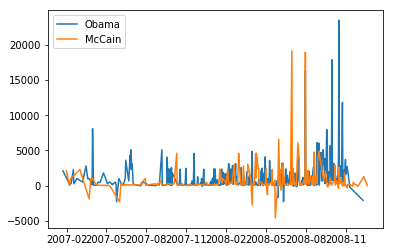

In [56]:
obama = sampled_df[['contb_receipt_dt', 'contb_receipt_amt', 'cand_nm']]
obama = obama[obama['cand_nm']=='Obama, Barack']
obama_new = obama[['contb_receipt_dt', 'contb_receipt_amt']]
result_1 = obama_new.groupby('contb_receipt_dt').sum()

mccain = sampled_df[['contb_receipt_dt', 'contb_receipt_amt', 'cand_nm']]
mccain = mccain[mccain['cand_nm']=='McCain, John S']
mccain_new = mccain[['contb_receipt_dt', 'contb_receipt_amt']]
result_2 = mccain_new.groupby('contb_receipt_dt').sum()

plt.plot(result_1, label='Obama')
plt.plot(result_2, label='McCain')
plt.legend(loc='best')

Q7) Please draw the cumulative donations for Obama ('Obama, Barack') vs. McCain ('McCain, John S').

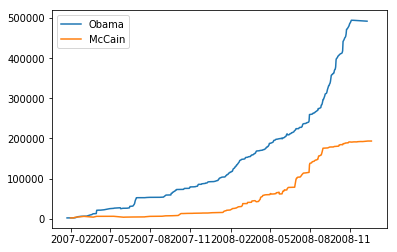

In [57]:
result_1cum = result_1.cumsum()
result_2cum = result_2.cumsum()
plt.plot(result_1cum, label='Obama')
plt.plot(result_2cum, label='McCain')
plt.legend(loc='best')

Q8) Please draw a histogram using 'contb_receipt_amt' for Obama and McCain.

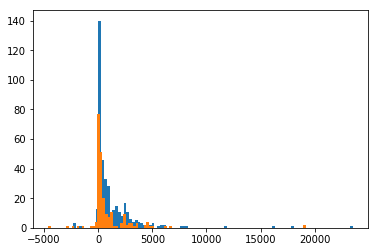

In [58]:
plt.hist(result_1['contb_receipt_amt'], bins=100)
plt.hist(result_2['contb_receipt_amt'], bins=100)
plt.show()

Q9) Now create a cumulative line graph of Obama and McCain' s donations. The x-axis should be the donation amount, and the y-axis should be the cumulative donations up to that amount.

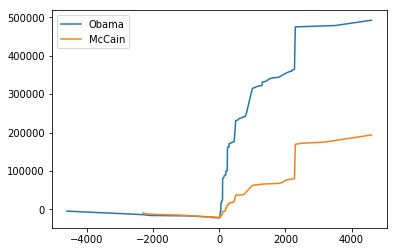

In [59]:
obama_new_1 = obama[['contb_receipt_amt']]
obama_new_1 = obama_new_1.sort_values('contb_receipt_amt')
obama_new_1['contb_receipt_amt_cum'] = obama_new_1
result_1_new = obama_new_1.groupby('contb_receipt_amt').sum()
result_1_new['contb_receipt_amt_cum'] = result_1_new.cumsum()

mccain_new_1 = mccain[['contb_receipt_amt']]
mccain_new_1 = mccain_new_1.sort_values('contb_receipt_amt')
mccain_new_1['contb_receipt_amt_cum'] = mccain_new_1
result_2_new = mccain_new_1.groupby('contb_receipt_amt').sum()
result_2_new['contb_receipt_amt_cum'] = result_2_new.cumsum()

plt.plot(result_1_new, label='Obama')
plt.plot(result_2_new, label='McCain')
plt.legend(loc='best')

#obama_new_1['contb_receipt_amt_cum'] = obama_new_1['contb_receipt_amt'].map(lambda x: )
#result_1_new = obama_new[obama_new.groupby('contb_receipt_amt'), obama_new.groupby('contb_receipt_amt').sum()]
#result_2_new = mccain_new.groupby('contb_receipt_amt').sum()
#result_1_newcum = result_1_new.cumsum()
#result_2_newcum = result_2_new.cumsum()
#plt.plot(result_1_newcum, label='Obama')
#plt.plot(result_2_newcum, label='McCain')
#plt.legend(loc='best')
#plt.plot(x = result_1_new['contb_receipt_amt'], y = result_1_new['contb_receipt_amt_cum'])
#result_1_new.describe
#obama_new_1.describe
#plt.plot(x = obama_new_1['contb_receipt_amt'], y = obama_new_1['contb_receipt_amt_cum'])

We can see that even though Obama and McCain have some very large contributions, the vast majority of their total donations were from small contributors. Also, not only did Obama get more donations, he also received larger donations.

Q10) Scatter plot for all candidates. The x-axis is the donation date and the y-axis is the donation amount.

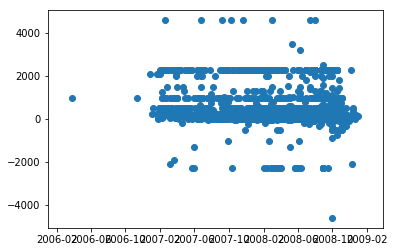

In [60]:
plt.figure()
plt.scatter(sampled_df['contb_receipt_dt'].tolist(), sampled_df['contb_receipt_amt'].tolist())

Q11) Scatter plot of re-attribution by spouses for all candidates. Find all re-attribution by spouses data points for each candidate and plot them on a scatter plot. The x-axis is the donation date and the y-axis is the donation amount.

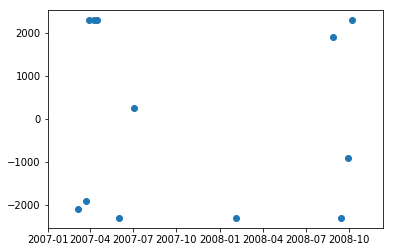

In [61]:
sampled_df_new = sampled_df[sampled_df.receipt_desc == 'REATTRIBUTION TO SPOUSE']
sampled_df_new_2 = sampled_df[sampled_df.receipt_desc == 'REATTRIBUTION FROM SPOUSE']
sampled_df_new = sampled_df_new.append(sampled_df_new_2)
#sampled_df_new.describe
plt.scatter(sampled_df_new['contb_receipt_dt'].tolist(), sampled_df_new['contb_receipt_amt'].tolist())

Q12) Let's now filter the contributions to only see the cumulative "reattrbituion to spouse" donations. Which candidate do the dark, hooded CEOs prefer? You will need to find the name of the field that contains the "reattribution" text, and filter on that field. Depending on how you filter it, you may get different results. Try out a few ways to see what happens.

In [70]:
sampled_df_new = sampled_df[sampled_df.receipt_desc == 'REATTRIBUTION TO SPOUSE']
#sampled_df_new = sampled_df[sampled_df.contbr_occupation == 'C.E.O.']
sampled_df_new.describe
sampled_df_new.cand_nm[sampled_df_new.contbr_occupation == 'C.E.O.']

501348    Romney, Mitt
Name: cand_nm, dtype: object